# Value function for random policy

In [2]:
import numpy as np
import easy21env as easy21
import easy21_table
import pandas as pd
import random
import easy21_table
from numba import njit
from numba import jit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 10)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
v = easy21_table.create_v()
q = easy21_table.create_q()
v_N = easy21_table.create_v()
q_N = easy21_table.create_q()
v_sum_reward = easy21_table.create_v()
q_sum_reward = easy21_table.create_q()

In [11]:
@njit
def episode(v, v_N, v_sum_reward):
    for i in range(10000000):
        player_card = easy21.take(0)
        dealer_card = easy21.take(0)
        player_score = player_card[0]
        rewards = [] 
        player_scores = [player_score]
        terminal = False
        while terminal == False:
            action = 1 if random.random() > 0.5  else 0 
            dealer_card, player_score, terminal, reward = easy21.step(dealer_card, player_score, action)
            terminal = terminal 
            rewards.append(reward)
            if terminal == False:
                #Update player score
                player_score = player_score 
                player_scores.append(player_score)
            dealer_score = dealer_card[0]
        expected_future_reward = 0
        for i in range(len(player_scores) - 1, 0, -1):
            expected_future_reward += rewards[i] 
            v_N = easy21_table.set_v(v_N, dealer_score, player_scores[i], 
                               easy21_table.get_v(v_N, dealer_score, player_scores[i]) + 1)
            v_sum_reward = easy21_table.set_v(v_sum_reward, dealer_score, player_scores[i], 
                               easy21_table.get_v(v_sum_reward, dealer_score, player_scores[i]) + reward)
            v = easy21_table.set_v(v, dealer_score, player_scores[i], 
                                   easy21_table.get_v(v_sum_reward, dealer_score, player_scores[i]) / 
                                   easy21_table.get_v(v_N, dealer_score, player_scores[i]))
    return v, v_N, v_sum_reward

In [12]:
v, v_N, v_sum_reward = episode(v, v_N, v_sum_reward)

In [13]:
z = np.zeros((30, 11))
x, y = np.meshgrid(range(1,22), range(1,11))

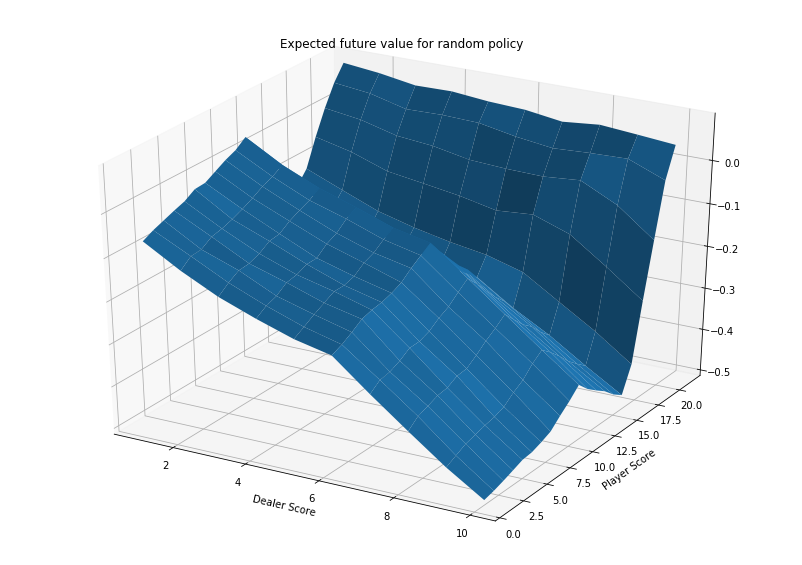

In [18]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(y, x , v)
plt.xlabel('Dealer Score')
plt.ylabel('Player Score')
plt.title('Expected future value for random policy')